#### Setup

In [1]:
from google.colab import drive
import sys

In [2]:
drive.mount('/content/drive')
sys.path.append('/content/drive/Shareddrives/CMPE260/')

Mounted at /content/drive


In [9]:
%run /content/drive/Shareddrives/CMPE260/code/rec_implementation.ipynb

cpu


#### Training

In [4]:
gaussian_noise = GaussianStrategy()

In [5]:
train_env = Environment(train_matrix)

hits, dcgs = [], []
hits_all, dcgs_all = [], []
step, best_step = 0, 0
step, best_step, best_step_all = 0, 0, 0

users = np.random.permutation(apt_users)

In [6]:
for u in tqdm.tqdm(users):
    print('user =', u)
    user, memory = train_env.reset(u)

    for t in range(int(train_matrix[u].sum())):
      try:
        # given current state, get action using actor network
        action_emb = policy_network(state_representation(user, memory))
        action_emb = gaussian_noise.get_action(action_emb[0], t)

        action = policy_network.get_action(user, torch.tensor(train_env.memory[user.detach().cpu().numpy().astype(int), :]), state_representation, action_emb,
            torch.tensor([item for item in train_env.available_books if item not in train_env.viewed_books]).long()
        )
      except Exception as e:
        print(e)

      # update replay buffer
      user, memory, reward, done = train_env.step(action, action_emb, replay_buffer)

      # update weights of action and critic network
      if len(replay_buffer) > params['batch_size']:
          update(params['batch_size'], params['gamma'], params['min_value'], params['max_value'], params['soft_tau'])

      # monitor training process by evaluating on only one user for efficiency
      if step % 100 == 0 and step > 0:
          hit, dcg = evaluation(policy_network, state_representation, train_env.memory, test_loader)

          hits.append(hit)
          dcgs.append(dcg)

          if np.mean(np.array([hit, dcg]) - np.array([hits[best_step], dcgs[best_step]])) >= 0:
              best_step = step // 100
              torch.save(policy_network.state_dict(), params['log_w_gaussian_dir'] + 'policy_net.pth')
              torch.save(value_network.state_dict(), params['log_w_gaussian_dir'] + 'value_net.pth')
              torch.save(state_representation.state_dict(), params['log_w_gaussian_dir'] + 'state_repr.pth')

      # evaluate for best policy after every 1000 steps on the whole test set
      if step % 1000 == 0 and step > 0:
          hit, dcg = evaluation(policy_network, state_representation, train_env.memory, full_loader)

          hits_all.append(hit)
          dcgs_all.append(dcg)

          if np.mean(np.array([hit, dcg]) - np.array([hits_all[best_step_all], dcgs_all[best_step_all]])) >= 0:
              best_step_all = step // 1000
              torch.save(policy_network.state_dict(), params['log_w_gaussian_dir'] + 'best_policy_net.pth')
              torch.save(value_network.state_dict(), params['log_w_gaussian_dir'] + 'best_value_net.pth')
              torch.save(state_representation.state_dict(), params['log_w_gaussian_dir'] + 'best_state_repr.pth')

      step += 1

  0%|          | 0/52 [00:00<?, ?it/s]

user = 25


  2%|▏         | 1/52 [00:15<13:00, 15.30s/it]

user = 132


  4%|▍         | 2/52 [00:24<09:55, 11.90s/it]

user = 137


  6%|▌         | 3/52 [00:34<08:52, 10.86s/it]

user = 144


  8%|▊         | 4/52 [00:44<08:22, 10.47s/it]

user = 136


 10%|▉         | 5/52 [00:51<07:11,  9.18s/it]

user = 213


 12%|█▏        | 6/52 [01:01<07:23,  9.64s/it]

user = 27


 13%|█▎        | 7/52 [05:38<1:12:48, 97.07s/it]

user = 36


 15%|█▌        | 8/52 [05:50<51:19, 69.98s/it]  

user = 83


 17%|█▋        | 9/52 [06:02<37:11, 51.90s/it]

user = 162


 19%|█▉        | 10/52 [06:09<26:36, 38.00s/it]

user = 67


 21%|██        | 11/52 [06:21<20:21, 29.80s/it]

user = 32


 23%|██▎       | 12/52 [06:26<14:58, 22.45s/it]

user = 143


 25%|██▌       | 13/52 [11:14<1:06:46, 102.72s/it]

user = 141


 27%|██▋       | 14/52 [11:21<46:48, 73.92s/it]   

user = 205


 29%|██▉       | 15/52 [11:29<33:15, 53.92s/it]

user = 70


 31%|███       | 16/52 [11:34<23:36, 39.33s/it]

user = 38


 33%|███▎      | 17/52 [11:43<17:42, 30.36s/it]

user = 93


 35%|███▍      | 18/52 [11:53<13:38, 24.09s/it]

user = 54


 37%|███▋      | 19/52 [12:02<10:42, 19.47s/it]

user = 99


 38%|███▊      | 20/52 [16:36<51:15, 96.12s/it]

user = 5


 40%|████      | 21/52 [16:44<35:51, 69.39s/it]

user = 21


 42%|████▏     | 22/52 [16:51<25:22, 50.74s/it]

user = 196


 44%|████▍     | 23/52 [16:58<18:16, 37.82s/it]

user = 211


 46%|████▌     | 24/52 [17:09<13:50, 29.64s/it]

user = 203


 48%|████▊     | 25/52 [17:17<10:23, 23.10s/it]

user = 14


 50%|█████     | 26/52 [17:25<08:02, 18.55s/it]

user = 243


 52%|█████▏    | 27/52 [22:01<39:58, 95.93s/it]

user = 125


 54%|█████▍    | 28/52 [22:10<27:58, 69.92s/it]

user = 75


 56%|█████▌    | 29/52 [22:17<19:28, 50.82s/it]

user = 1


 58%|█████▊    | 30/52 [22:27<14:12, 38.76s/it]

user = 43


 60%|█████▉    | 31/52 [22:36<10:25, 29.80s/it]

user = 12


 62%|██████▏   | 32/52 [22:45<07:51, 23.56s/it]

user = 239


 63%|██████▎   | 33/52 [27:22<31:33, 99.64s/it]

user = 124


 65%|██████▌   | 34/52 [27:35<22:02, 73.45s/it]

user = 198


 67%|██████▋   | 35/52 [27:41<15:07, 53.41s/it]

user = 242


 69%|██████▉   | 36/52 [27:54<11:00, 41.26s/it]

user = 105


 71%|███████   | 37/52 [28:02<07:50, 31.34s/it]

user = 212


 73%|███████▎  | 38/52 [28:13<05:52, 25.15s/it]

user = 226


 75%|███████▌  | 39/52 [32:54<22:04, 101.85s/it]

user = 78


 77%|███████▋  | 40/52 [33:03<14:47, 73.95s/it] 

user = 63


 79%|███████▉  | 41/52 [33:11<09:56, 54.24s/it]

user = 238


 81%|████████  | 42/52 [33:17<06:38, 39.80s/it]

user = 11


 83%|████████▎ | 43/52 [33:27<04:36, 30.74s/it]

user = 172


 85%|████████▍ | 44/52 [33:34<03:09, 23.69s/it]

user = 179


 87%|████████▋ | 45/52 [33:44<02:16, 19.47s/it]

user = 184


 88%|████████▊ | 46/52 [38:21<09:41, 96.84s/it]

user = 222


 90%|█████████ | 47/52 [38:30<05:52, 70.58s/it]

user = 82


 92%|█████████▏| 48/52 [38:39<03:27, 51.95s/it]

user = 52


 94%|█████████▍| 49/52 [38:49<01:58, 39.48s/it]

user = 199


 96%|█████████▌| 50/52 [38:55<00:58, 29.45s/it]

user = 134


 98%|█████████▊| 51/52 [39:08<00:24, 24.32s/it]

user = 22


100%|██████████| 52/52 [43:43<00:00, 50.46s/it]


In [ ]:
with open(params['log_w_gaussian_dir'] + 'memory.pickle', 'wb') as f:
  pickle.dump(train_env.memory, f)

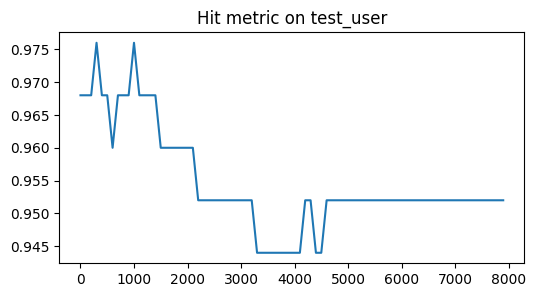

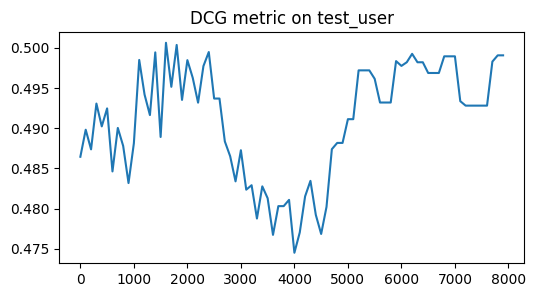

In [10]:
plot_hit(hits, 100, 'test_user')
plot_dcg(dcgs, 100, 'test_user')

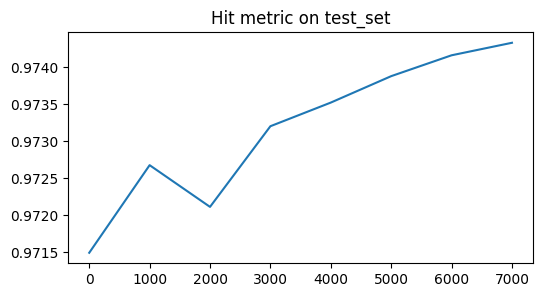

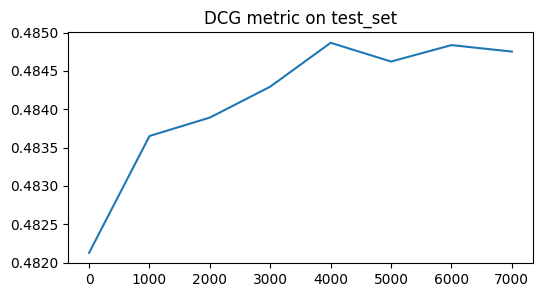

In [11]:
plot_hit(hits_all, 1000, 'test_set')
plot_dcg(dcgs_all, 1000, 'test_set')

#### Evaluation on test set

In [ ]:
with open(params['log_w_gaussian_dir'] + 'memory.pickle', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
state_rep = State_Representation(num_of_users, num_of_books, params['embedding_dim'], params['hidden_dim'])
policy = Actor(params['embedding_dim'], params['hidden_dim'])

state_rep.load_state_dict(torch.load(params['log_w_gaussian_dir'] + 'best_state_repr.pth'))
policy.load_state_dict(torch.load(params['log_w_gaussian_dir'] + 'best_policy_net.pth'))

<All keys matched successfully>

In [ ]:
hit, dcg = evaluation(policy, state_rep, memory, full_loader)
print('hit rate: ', hit, 'dcg: ', dcg)

hit rate:  0.9741984015044663 dcg:  0.48333943031368515


#### Inference

In [ ]:
random_user = test_data['user'].sample().iloc[0]
random_user

89

In [ ]:
temp_test_data = test_data[test_data.user == random_user]
temp = pd.merge(temp_test_data, filtered_df, on=['user', 'book'])
temp

,user,book,isbn,title,author,user_id,rating,best_seller
0,89,154,385416342,The Firm,John Grisham,101851,8.0,True
1,89,679,399501487,Lord of the Flies,William Gerald Golding,101851,8.0,True
2,89,845,441328008,"Heretics of Dune (Dune Chronicles, Book 5)",Frank Herbert,101851,7.0,True
3,89,846,441294677,"God Emperor of Dune (Dune Chronicles, Book 4)",Frank Herbert,101851,7.0,False
4,89,1030,618002219,The Hobbit: or There and Back Again,J.R.R. Tolkien,101851,10.0,True
5,89,1283,811802981,The Golden Mean: In Which the Extraordinary Co...,Nick Bantock,101851,10.0,True
6,89,1873,439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,101851,10.0,True
7,89,3115,60652934,The Screwtape Letters,C. S. Lewis,101851,9.0,True
8,89,3451,761539220,The Sims Vacation: Expansion Pack: Prima's Off...,David Chong,101851,9.0,True
9,89,3916,345338588,"On a Pale Horse (Incarnations of Immortality, ...",Piers Anthony,101851,9.0,False


In [ ]:
recommendations = []

for model, state_representation in zip([policy], [state_rep]):
    env = Environment(test_matrix)
    user, memory = env.reset(random_user)

    # give 2 books that the user has rated in the past
    user, memory, reward, _ = env.step(torch.tensor([27873]))
    user, memory, reward, _ = env.step(torch.tensor([27879]))

    # get next 3 recommendations based on the two books above
    recs = []
    for i in range(3):
        action_emb = model(state_representation(user, memory))
        action = model.get_action(
            user,
            torch.tensor(env.memory[user.detach().cpu().numpy().astype(int), :]),
            state_representation,
            action_emb,
            torch.tensor([item for item in env.available_books if item not in env.viewed_books]).long()
        )
        user, memory, reward, _ = env.step(action)
        recs.append(action)

    recommendations.append(recs)

In [ ]:
recos = [r.item() for r in recommendations[0]]
recos

[1873, 10121, 17830]

In [ ]:
recommended_books = filtered_df[filtered_df.book.isin(recos)][['title', 'author', 'best_seller']].drop_duplicates()
recommended_books

,title,author,best_seller
67764,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,True
185486,Dead Man's Mirror,Agatha Christie,True
257056,Village Square (Homespun),Linda Eberhardt,True
